## 6.5 Unsupervise Machine Learning - cluster analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Cleaning preparation

### Importing libraries and data and renaming columns

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# Display plots inline
%matplotlib inline

In [4]:
# Turn project folder path into a string
path = r'/Users/peterreadman/Desktop/Python Projects/PortfolioProjects/HealthcareSpending/'

In [5]:
# import data

per_df = pd.read_csv(os.path.join(path,'02 Data','02a Original Data','pppub22.csv'))

### 2. Data Preparation 

In [6]:
per_df.head()

,PERIDNUM,PH_SEQ,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,OED_TYP3,PERRP,...,I_DISVL1,I_DISVL2,I_SURVL1,I_SURVL2,MIG_CBST,MIG_DSCP,DEP_STAT,FILEDATE,FILESTAT,YYYYMM
0,2022093493100051201101,1,1,1,1,1,0,0,0,41,...,0,0,0,0,0,0,0,72522,5,202203
1,2100059324402431401101,5,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,72522,1,202203
2,2100059324402431401102,5,2,2,1,1,0,0,0,42,...,0,0,0,0,0,0,0,72522,1,202203
3,1410320300869091411101,6,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,72522,1,202203
4,1410320300869091411102,6,2,2,1,1,0,0,0,42,...,0,0,0,0,0,0,0,72522,1,202203


In [7]:
# Define the renaming code in a list
column_renaming = [
    ('PERIDNUM', 'Person_ID'),
    ('A_AGE', 'Age'),
    ('A_SEX', 'Sex'),
    ('ANN_VAL', 'Retirement_Ann'),
    ('DBTN_VAL', 'Retirement_Dist'),
    ('ERN_VAL', 'Earnings_Net'),
    ('FRM_VAL', 'SE_FARM_2nd'),
    ('FRSE_VAL', 'SE_FARM_Tot'),
    ('MOOP', 'Total_OutOfPocket_Med_Exp'),
    ('MOOP2', 'Total_OutOfPocket_Med_Exp_2'),
    ('PEMCPREM', 'Medicare_Premium'),
    ('PHIP_VAL', 'Ins_Premium'),
    ('PHIP_VAL2', 'Ins_Premium_2'),
    ('PMED_VAL', 'Non_Premium_OutOfPocket'),
    ('POTC_VAL', 'OverTheCounter_Exp'),
    ('PTOTVAL', 'Tot_Per_Earn'),
    ('SEMP_VAL', 'SE_Tot'),
    ('SE_VAL', 'SE_2nd'),
    ('WSAL_VAL', 'Wages_Tot'),
    ('WS_VAL', 'Wages_Other')
]

# Extract the renamed columns into a new dataframe 'p_df'
p_df = pd.DataFrame()

for current_name, new_name in column_renaming:
    p_df[new_name] = per_df[current_name]

# Print the new dataframe 'p_df'
p_df.head()


,Person_ID,Age,Sex,Retirement_Ann,Retirement_Dist,Earnings_Net,SE_FARM_2nd,SE_FARM_Tot,Total_OutOfPocket_Med_Exp,Total_OutOfPocket_Med_Exp_2,Medicare_Premium,Ins_Premium,Ins_Premium_2,Non_Premium_OutOfPocket,OverTheCounter_Exp,Tot_Per_Earn,SE_Tot,SE_2nd,Wages_Tot,Wages_Other
0,2022093493100051201101,42,1,0,0,44200,0,0,3840,3840,0,3840,3840,0,0,44220,0,0,44200,0
1,2100059324402431401101,62,1,0,0,30000,2500,2500,568,568,0,200,200,320,48,32702,30100,100,0,0
2,2100059324402431401102,64,2,0,0,48000,0,0,1300,1300,0,1200,1200,0,100,50050,0,0,48000,0
3,1410320300869091411101,26,1,0,0,40000,0,0,100,100,0,0,0,0,100,40001,0,0,40000,0
4,1410320300869091411102,24,2,0,0,20000,0,0,1400,1400,0,1000,1000,300,100,20000,0,0,20000,0


In [8]:
p_df.shape

(152732, 20)

In [9]:
p_df.dtypes

Person_ID                      object
Age                             int64
Sex                             int64
Retirement_Ann                  int64
Retirement_Dist                 int64
Earnings_Net                    int64
SE_FARM_2nd                     int64
SE_FARM_Tot                     int64
Total_OutOfPocket_Med_Exp       int64
Total_OutOfPocket_Med_Exp_2     int64
Medicare_Premium                int64
Ins_Premium                     int64
Ins_Premium_2                   int64
Non_Premium_OutOfPocket         int64
OverTheCounter_Exp              int64
Tot_Per_Earn                    int64
SE_Tot                          int64
SE_2nd                          int64
Wages_Tot                       int64
Wages_Other                     int64
dtype: object

In [10]:
p_df.describe()

,Age,Sex,Retirement_Ann,Retirement_Dist,Earnings_Net,SE_FARM_2nd,SE_FARM_Tot,Total_OutOfPocket_Med_Exp,Total_OutOfPocket_Med_Exp_2,Medicare_Premium,Ins_Premium,Ins_Premium_2,Non_Premium_OutOfPocket,OverTheCounter_Exp,Tot_Per_Earn,SE_Tot,SE_2nd,Wages_Tot,Wages_Other
count,152732.000000,152732.000000,152732.000000,1.527320e+05,1.527320e+05,1.527320e+05,1.527320e+05,152732.000000,152732.000000,152732.00000,152732.000000,152732.000000,152732.000000,152732.000000,1.527320e+05,1.527320e+05,1.527320e+05,1.527320e+05,1.527320e+05
mean,38.277971,1.511235,160.707134,5.910255e+02,2.979632e+04,3.941788e+01,1.495293e+02,1779.487187,1818.940170,240.92826,934.130208,973.583191,683.245233,162.111745,3.971017e+04,1.475694e+03,1.968581e+02,2.918269e+04,7.753228e+02
std,23.223057,0.499875,4604.239571,9.390975e+03,6.314374e+04,3.256097e+03,5.185724e+03,3622.478405,3651.422442,720.02319,2430.437742,2464.968226,2207.327233,357.770720,7.307070e+04,1.664588e+04,7.476453e+03,6.316260e+04,8.435000e+03
min,0.000000,1.000000,0.000000,0.000000e+00,-9.999000e+03,-9.999000e+03,-1.000000e+04,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-9.999000e+03,-9.999000e+03,-9.999000e+03,0.000000e+00,0.000000e+00
25%,17.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,50.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,38.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,400.000000,425.000000,0.00000,0.000000,0.000000,100.000000,60.000000,1.986850e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,57.000000,2.000000,0.000000,0.000000e+00,4.200000e+04,0.000000e+00,0.000000e+00,2084.000000,2150.000000,0.00000,600.000000,720.000000,500.000000,200.000000,5.200500e+04,0.000000e+00,0.000000e+00,4.200000e+04,0.000000e+00
max,85.000000,2.000000,999999.000000,1.035999e+06,1.099999e+06,1.099999e+06,1.099999e+06,240437.000000,240437.000000,11760.00000,160000.000000,160000.000000,240000.000000,15000.000000,2.082782e+06,1.099999e+06,1.099999e+06,1.550000e+06,1.099999e+06


In [11]:
# Check for missing values

p_df.isnull().sum()

Person_ID                      0
Age                            0
Sex                            0
Retirement_Ann                 0
Retirement_Dist                0
Earnings_Net                   0
SE_FARM_2nd                    0
SE_FARM_Tot                    0
Total_OutOfPocket_Med_Exp      0
Total_OutOfPocket_Med_Exp_2    0
Medicare_Premium               0
Ins_Premium                    0
Ins_Premium_2                  0
Non_Premium_OutOfPocket        0
OverTheCounter_Exp             0
Tot_Per_Earn                   0
SE_Tot                         0
SE_2nd                         0
Wages_Tot                      0
Wages_Other                    0
dtype: int64

In [12]:
# Count all the 0 values

In [13]:
zero_counts = p_df.apply(lambda x: (x == 0).sum()).reset_index()
zero_counts.columns = ['Column', 'Count of 0 values']

print(zero_counts)

                         Column  Count of 0 values
0                     Person_ID                  0
1                           Age               1430
2                           Sex                  0
3                Retirement_Ann             150982
4               Retirement_Dist             148239
5                  Earnings_Net              77092
6                   SE_FARM_2nd             151958
7                   SE_FARM_Tot             151615
8     Total_OutOfPocket_Med_Exp              25708
9   Total_OutOfPocket_Med_Exp_2              25030
10             Medicare_Premium             134173
11                  Ins_Premium             103400
12                Ins_Premium_2             100488
13      Non_Premium_OutOfPocket              58902
14           OverTheCounter_Exp              39078
15                 Tot_Per_Earn              46089
16                       SE_Tot             147008
17                       SE_2nd             151127
18                    Wages_Tot

In [14]:
# Check the number of rows with '0' value in Age and Tot_Per_Earn
rows_with_zero = p_df[['Age', 'Tot_Per_Earn', 'Total_OutOfPocket_Med_Exp']].eq(0).all(axis=1).sum()

print("Number of rows with '0' value in Age, Total Income, Total Out-of-pocket:", rows_with_zero)

Number of rows with '0' value in Age, Total Income, Total Out-of-pocket: 732


In [15]:
# remove these rows

In [16]:
# Specify the columns to check for '0' values
columns_to_check = ['Age', 'Tot_Per_Earn', 'Total_OutOfPocket_Med_Exp']

# Filter the DataFrame to exclude rows with '0' values in specified columns
df = p_df[~(p_df[columns_to_check].eq(0).all(axis=1))]

In [17]:
df.shape

(152000, 20)

In [18]:
zero_counts = df.apply(lambda x: (x == 0).sum()).reset_index()
zero_counts.columns = ['Column', 'Count of 0 values']

print(zero_counts)

                         Column  Count of 0 values
0                     Person_ID                  0
1                           Age                698
2                           Sex                  0
3                Retirement_Ann             150250
4               Retirement_Dist             147507
5                  Earnings_Net              76360
6                   SE_FARM_2nd             151226
7                   SE_FARM_Tot             150883
8     Total_OutOfPocket_Med_Exp              24976
9   Total_OutOfPocket_Med_Exp_2              24298
10             Medicare_Premium             133441
11                  Ins_Premium             102668
12                Ins_Premium_2              99756
13      Non_Premium_OutOfPocket              58170
14           OverTheCounter_Exp              38346
15                 Tot_Per_Earn              45357
16                       SE_Tot             146276
17                       SE_2nd             150395
18                    Wages_Tot

In [19]:
# Variables to run k-means analysis on:
cluster_columns = [
        #'Person_ID'
        'Age'
        #,'Sex'
        #,'Retirement_Ann'
        #,'Retirement_Dist'
        #,'Earnings_Net'
        #,'SE_FARM_2nd'
        #,'SE_FARM_Tot'
        ,'Total_OutOfPocket_Med_Exp'
        #,'Total_OutOfPocket_Med_Exp_2'
        #,'Medicare_Premium'
        #,'Ins_Premium'
        #,'Ins_Premium_2'
        #,'Non_Premium_OutOfPocket'
        #,'OverTheCounter_Exp'
        ,'Tot_Per_Earn'
        #,'SE_Tot'
        #,'SE_2nd'
        #,'Wages_Tot'
        #,'Wages_Other'
    ]


In [20]:
df_clust = df[cluster_columns].copy()
df_clust.shape

(152000, 3)

In [21]:
# Remove rows where Total Income is 0
df_clust = df_clust[df_clust['Tot_Per_Earn'] != 0].copy()
df_clust.shape

(106643, 3)

In [22]:
zero_counts = df_clust.apply(lambda x: (x == 0).sum()).reset_index()
zero_counts.columns = ['Column', 'Count of 0 values']

print(zero_counts)

                      Column  Count of 0 values
0                        Age                  0
1  Total_OutOfPocket_Med_Exp              11552
2               Tot_Per_Earn                  0


### 2. The elbow technique

In [23]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [24]:
score = [kmeans[i].fit(df_clust).score(df_clust) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-713170348033503.9,
 -359359051242020.5,
 -174042644369507.25,
 -101613769454064.27,
 -66036964242779.65,
 -47352313533720.95,
 -37039517740916.17,
 -29973697594645.656,
 -24927496135584.957]

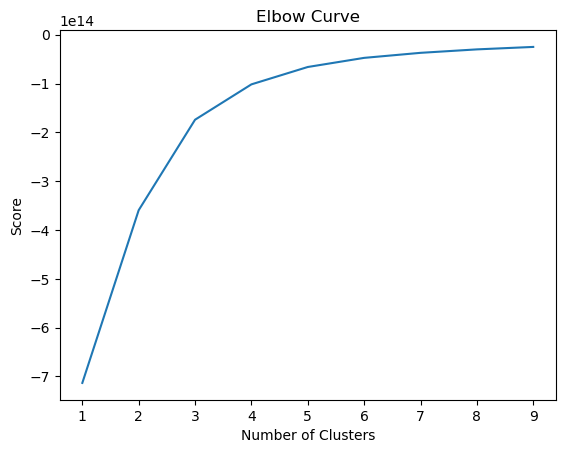

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means clustering

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) #, n_jobs = -1) 

In [27]:
# Fit the k-means object to the data.

kmeans.fit(df_clust)

KMeans(n_clusters=3)

In [28]:
df_clust['clusters'] = kmeans.fit_predict(df_clust)

In [29]:
df_clust.head()

,Age,Total_OutOfPocket_Med_Exp,Tot_Per_Earn,clusters
0,42,3840,44220,0
1,62,568,32702,0
2,64,1300,50050,0
3,26,100,40001,0
4,24,1400,20000,0


In [30]:
df_clust['clusters'].value_counts()

0    93609
2    12554
1      480
Name: clusters, dtype: int64

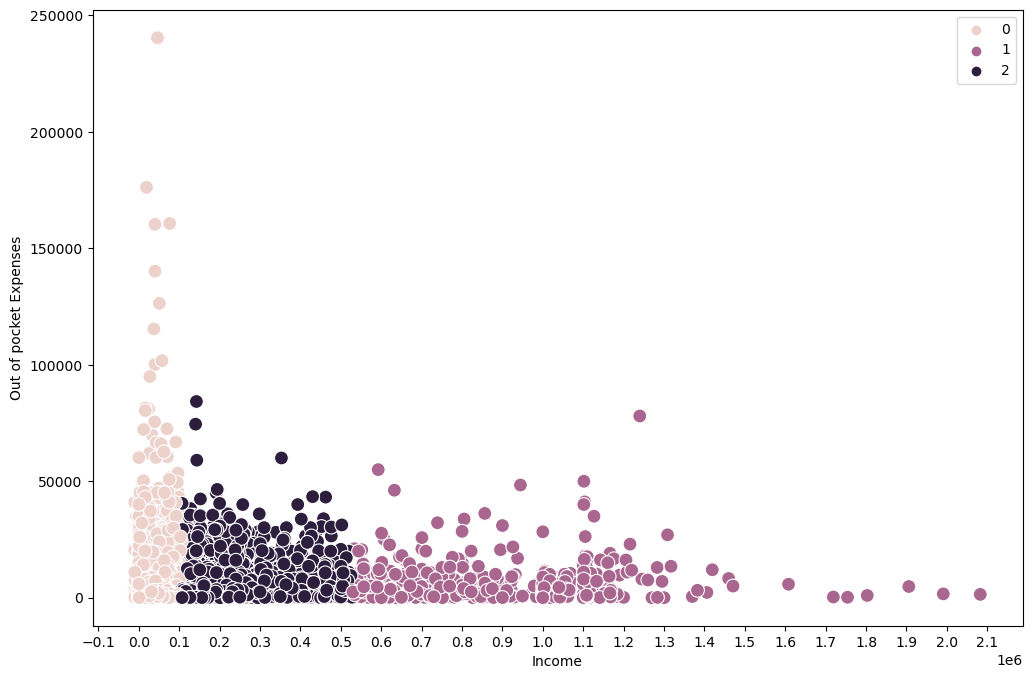

In [48]:
# Plot the clusters for the "Total out-of-pocket expenses" and "Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clust['Tot_Per_Earn'], y=df_clust['Total_OutOfPocket_Med_Exp'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Income') # Label x-axis.
plt.ylabel('Out of pocket Expenses') # Label y-axis.

# Set the x-axis ticker to show every $50k
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))


plt.show()

## Observations
### Income and Total out-of-pocket costs
- The three clusters are determined by 'Income' with boundaries at approximately less than 100,000, 100,000 to 500,000 and over 500,000
- All of the most extreme out-of-pocket costs (over 100,000) fell on the lowest-income cluster
- The clusters reveal a more tangible relationship between lower-income and higher out-of-pocket costs than linnear regression analysis did
- all of the very highest income individuals (over 1.5million) had the lowest out-of-pocket costs

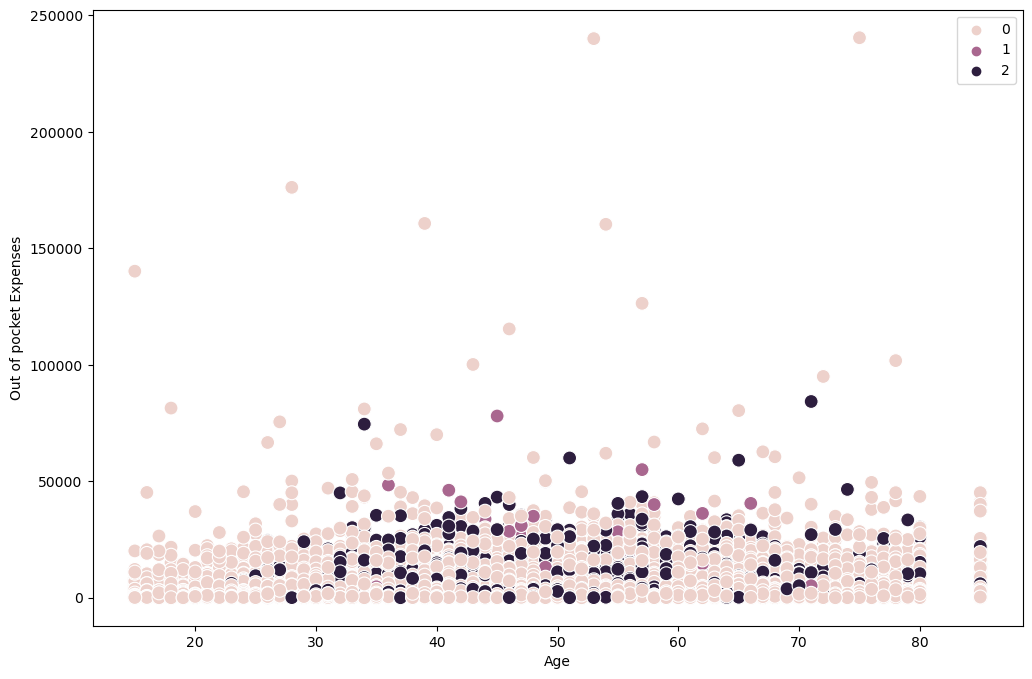

In [32]:
# Plot the clusters for the "Total out-of-pocket expenses" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clust['Age'], y=df_clust['Total_OutOfPocket_Med_Exp'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Out of pocket Expenses') # Label y-axis.
plt.show()

## Observations
### Age and Total out-of-pocket costs
While there is no visible linear connection between Age and Out-of-Pocket costs, the scatterplot above does indicate the following:
- The very highest out-of-pocket costs (over 100,000) fell on individuals from all age-ranges from teenagers to senior citizens, suggesting Age is no protection against high out-of-pocket costs
- the middle and high income clusters are generally made up of people between 30 and 60 years old

## Descriptive Statistics for clusters

In [33]:
df_clust.loc[df_clust['clusters'] == 2, 'cluster'] = 'dark purple'
df_clust.loc[df_clust['clusters'] == 1, 'cluster'] = 'purple'
df_clust.loc[df_clust['clusters'] == 0, 'cluster'] = 'pink'

In [34]:
df_clust.groupby('cluster').agg({'Tot_Per_Earn':['mean', 'median'], 
                         'Age':['mean', 'median'], 
                         'Total_OutOfPocket_Med_Exp':['mean', 'median']})

Tot_Per_Earn                  Age         \
                      mean    median       mean median   
cluster                                                  
dark purple  174556.606739  150001.0  49.720487   49.0   
pink          36852.576355   31201.0  48.078572   47.0   
purple       883119.097917  875467.0  51.702083   51.0   

            Total_OutOfPocket_Med_Exp          
                                 mean  median  
cluster                                        
dark purple               4159.933965  2636.5  
pink                      2090.208837   700.0  
purple                    6094.429167  3175.0

#### Observations:
- All three clusters have a similar average age (from 49–51) indicating a normal distribution of the survey population by age
- The highest average out-of-pocket costs fall on the 'purple' cluster, the 'middle-income' cluster with a mean annual cost of 6094 and and median of 3175
- The lowest average out-of-pocket costs fall on the 'pink' cluster, the 'lower-income' cluster with a mean annual cost of 2090 and median of 700.
- These statistics do not reveal the outlier extreme out-of-pocket costs experienced by lower-income individuals

#### Ideas for next steps:
- conduct analysis on categorical variables with total out-of-pocket costs